## Importing Libraries

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from pathlib import Path
import warnings

In [114]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

## Loading Data

In [115]:
# You can get data from: https://www.kaggle.com/datasets/sehriyarmemmedli/binaaz-sale-project

full_path = Path("../data")
path = full_path / "house_sale.csv"
data = pd.read_csv(path);

## Overlooking

In [116]:
data.head()

,id_x,rel_url,estate_rel_url_x,datetime_scrape_x,price,currency_x,location,attributes,city_when,city,day_x,hour_x,repair,vip,featured,products_label,bill_of_sale,mortgage,img_url,id_y,estate_id,estate_rel_url_y,datetime_scrape_y,description,unit_price,total_price,currency_y,owner_name,owner_title,shop_name,shop_title,address,lat,lng,updated,views,day_y,hour_y,estate_details_id_x,Binanın növü,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Təmir,Çıxarış,İpoteka,estate_details_id_y,estate_rel_url,extra_info
0,5df36281-6dc6-4d5d-89a7-5fcfa86f7608,/alqi-satqi?page=174,/items/4521724,2024-10-05 22:07:37.60613+00,499999.0,AZN,Səbail r.,"4 otaqlı, 145 m², 7/9 mərtəbə","Bakı, dünən 23:52",bakı,05.10.2024,23:52,Təmirli,vipped,featured,NaN,Çıxarış var,NaN,https://bina.azstatic.com/uploads/f460x345/202...,92e82ea2-e1f3-4c2d-a284-151efd99281e,5df36281-6dc6-4d5d-89a7-5fcfa86f7608,/items/4521724,2024-10-05 22:14:10.089116+00,"Səbail Rayonu, İzzət Nəbiyev küçəsi, Fəxri Xiy...",3 450 AZN/m²,499999.0,AZN,Kamran,mülkiyyətçi,NaN,NaN,İzzət Nəbiyev küç.,40.358817,49.824092,yeniləndi: dünən 23:52,1155,05.10.2024,23:52,92e82ea2-e1f3-4c2d-a284-151efd99281e,NaN,Köhnə tikili,7 / 9,4.0,145 m²,NaN,var,var,NaN,92e82ea2-e1f3-4c2d-a284-151efd99281e,/items/4521724,Şəhidlər xiyabanı * Dağüstü parkı * Səbail r.
1,883e20f0-8872-49a5-8b4b-63b8301b5f8f,/alqi-satqi?page=250,/items/4669294,2024-10-05 22:07:37.60613+00,77000.0,AZN,Biləcəri q.,"4 otaqlı, 90 m²","Bakı, dünən 23:56",bakı,05.10.2024,23:56,Təmirli,NaN,NaN,NaN,NaN,NaN,https://bina.azstatic.com/uploads/f460x345/202...,505eaf81-6bc8-4094-9b00-aa82066548ee,883e20f0-8872-49a5-8b4b-63b8301b5f8f,/items/4669294,2024-10-05 22:14:10.089116+00,"Biləcəridə Abidəyə yaxin 91,92,202 saylı marşr...",NaN,77000.0,AZN,Dasinmaz Emlak,vasitəçi (agent),NaN,NaN,Biləcəri qəs.,40.420897,49.807035,yeniləndi: 04 oktyabr 2024,218,04.10.2024,NaN,505eaf81-6bc8-4094-9b00-aa82066548ee,NaN,Həyət evi/Bağ evi,NaN,4.0,90 m²,1.3 sot,var,yoxdur,NaN,505eaf81-6bc8-4094-9b00-aa82066548ee,/items/4669294,Binəqədi r.* Biləcəri q.
2,55c36fb1-a3af-476e-ba17-a81f6795be8d,/alqi-satqi?page=250,/items/4669293,2024-10-05 22:07:37.60613+00,92000.0,AZN,İnşaatçılar m.,"3 otaqlı, 60 m²","Bakı, dünən 23:55",bakı,05.10.2024,23:55,Təmirli,NaN,NaN,NaN,Çıxarış var,NaN,https://bina.azstatic.com/uploads/f460x345/202...,fa63b201-999d-43b5-a61a-778d9d79a6c6,55c36fb1-a3af-476e-ba17-a81f6795be8d,/items/4669293,2024-10-05 22:14:10.089116+00,Salam əleykum. \nİnşaatçılar metrosuna yaxın m...,NaN,92000.0,AZN,Məhəmməd,vasitəçi (agent),NaN,NaN,Mirzə Cabbar Məmmədzadə küç.,40.390293,49.802656,yeniləndi: 04 oktyabr 2024,190,04.10.2024,NaN,fa63b201-999d-43b5-a61a-778d9d79a6c6,NaN,Həyət evi/Bağ evi,NaN,3.0,60 m²,0.1 sot,var,var,NaN,fa63b201-999d-43b5-a61a-778d9d79a6c6,/items/4669293,İnşaatçılar m.* Yasamal r.
3,acf1aa8d-a46a-40f5-b6f2-f7a449569337,/alqi-satqi?page=250,/items/4647811,2024-10-05 22:07:37.60613+00,95000.0,AZN,Qaraçuxur q.,130 m²,"Bakı, dünən 23:55",bakı,05.10.2024,23:55,Təmirli,vipped,featured,NaN,Çıxarış var,İpoteka var,https://bina.azstatic.com/uploads/f460x345/202...,5db56980-05cc-4925-b55b-f58fb3f4d2b6,acf1aa8d-a46a-40f5-b6f2-f7a449569337,/items/4647811,2024-10-05 22:14:10.089116+00,Barter maraqlidir üstünlük maşina verilir\nHər...,NaN,95000.0,AZN,Elçin,mülkiyyətçi,NaN,NaN,Qaraçuxur qəs.,40.393614,49.981553,yeniləndi: 04 oktyabr 2024,1314,04.10.2024,NaN,5db56980-05cc-4925-b55b-f58fb3f4d2b6,NaN,Obyekt,NaN,NaN,130 m²,NaN,var,var,var,5db56980-05cc-4925-b55b-f58fb3f4d2b6,/items/4647811,Suraxanı r.* Qaraçuxur q.
4,22d840df-9283-4112-bc71-7432511fc776,/alqi-satqi?page=250,/items/4638863,2024-10-05 22:07:37.60613+00,220000.0,AZN,Əhmədli m.,"3 otaqlı, 100 m², 15/16 mərtəbə","Bakı, dünən 23:52",bakı,05.10.2024,23:52,Təmirli,NaN,NaN,Agentlik,Çıxarış var,NaN,https://bina.azstatic.com/uploads/f460x345/202...,d71cf9a9-86dd-4162-b540-6252a8659a09,22d840df-9283-4112-bc71-7432511fc776,/items/4638863,2024-10-05 22:14:10.089116+00,Əhmədli qəs. Qaçaq Nəbi küçəsi 3 otaga duzelm...

In [117]:
data.describe(include="all")

,id_x,rel_url,estate_rel_url_x,datetime_scrape_x,price,currency_x,location,attributes,city_when,city,day_x,hour_x,repair,vip,featured,products_label,bill_of_sale,mortgage,img_url,id_y,estate_id,estate_rel_url_y,datetime_scrape_y,description,unit_price,total_price,currency_y,owner_name,owner_title,shop_name,shop_title,address,lat,lng,updated,views,day_y,hour_y,estate_details_id_x,Binanın növü,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Təmir,Çıxarış,İpoteka,estate_details_id_y,estate_rel_url,extra_info
count,100775,100775,100775,100775,1.007750e+05,100775,100775,100775,100775,100775,100775,100775,81612,8596,3149,72630,79565,32939,100775,100775,100775,100775,100775,100510,75996,1.007750e+05,100775,100118,100118,72018,72018,100775,100775.000000,100775.000000,100775,100775.000000,100775,15631,100775,154,100775,75996,91363.000000,100775,15571,94774,100775,32939,100775,100775,100775
unique,100775,411,64454,36,NaN,1,142,21347,1504,8,36,1226,1,1,1,2,1,1,64990,100775,100775,64454,152,63385,814,NaN,1,5448,2,316,1,16716,NaN,NaN,1145,NaN,38,1028,100775,3,7,392,NaN,1804,188,2,2,1,100775,64454,3000
top,e85db6c0-141d-44a3-a078-dcb4a4641091,/alqi-satqi?page=267,/items/4582627,2024-10-09 04:58:40.151251+00,NaN,AZN,Nəriman Nərimanov m.,"4 otaqlı, 160 m²","Bakı, dünən 12:26",bakı,08.10.2024,12:26,Təmirli,vipped,featured,Agentlik,Çıxarış var,İpoteka var,https://bina.azstatic.com/uploads/f460x345/202...,1af4df10-8bfe-4d29-8964-9d8533cd3883,e85db6c0-141d-44a3-a078-dcb4a4641091,/items/4582627,2024-10-09 05:02:29.349209+00,"""Knightsbridge Residence"" premium yaşayış komp...",2 500 AZN/m²,NaN,AZN,Elan sahibi,vasitəçi (agent),Real Əmlak Yeni Yasamal,Daşınmaz əmlak agentliyi,Mərdəkan qəsəbəsi,NaN,NaN,yeniləndi: 15 oktyabr 2024,NaN,08.10.2024,14:48,1af4df10-8bfe-4d29-8964-9d8533cd3883,Ev / Mənzil,Yeni tikili,5 / 5,NaN,100 m²,3 sot,var,var,var,1af4df10-8bfe-4d29-8964-9d8533cd3883,/items/4582627,Xəzər r.* Mərdəkan q.
freq,1,691,17,5322,NaN,100775,5390,593,218,100436,5322,218,81612,8596,3149,71981,79565,32939,13,1,1,17,5312,56,1192,NaN,100775,1618,89733,2482,72018,1372,NaN,NaN,3809,NaN,8490,54,1,85,57897,1989,NaN,3488,1759,81612,79565,32939,1,17,4825
mean,NaN,NaN,NaN,NaN,3.423557e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.423553e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.410846,49.886371,NaN,700.065185,NaN,NaN,NaN,NaN,NaN,NaN,3.133468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2.042627e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.042627e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.083193,0.265008,NaN,1680.672574,NaN,NaN,NaN,NaN,NaN,NaN,1.372981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,32.689217,12.591688,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.450000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.450000e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.381900,49.816470,NaN,99.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.180000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.180000e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.397219,49.852867,NaN,254.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3.380000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.380000e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.420578,49.948995,NaN,680.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Droping some values

In [118]:
df = data
df = df.drop_duplicates(subset=["estate_rel_url_x"], keep="last")

In [119]:
df = df[["price", "location", "city","address", "lat", "lng", "İpoteka", "Təmir","Kateqoriya", "Mərtəbə", "Otaq sayı", "Sahə", "Torpaq sahəsi", "Çıxarış"]]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64454 entries, 1 to 100774
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          64454 non-null  float64
 1   location       64454 non-null  object 
 2   city           64454 non-null  object 
 3   address        64454 non-null  object 
 4   lat            64454 non-null  float64
 5   lng            64454 non-null  float64
 6   İpoteka        21056 non-null  object 
 7   Təmir          60462 non-null  object 
 8   Kateqoriya     64454 non-null  object 
 9   Mərtəbə        48820 non-null  object 
 10  Otaq sayı      58360 non-null  float64
 11  Sahə           64454 non-null  object 
 12  Torpaq sahəsi  9632 non-null   object 
 13  Çıxarış        64454 non-null  object 
dtypes: float64(4), object(10)
memory usage: 7.4+ MB


In [121]:
[(item,df[item].isna().sum()) for item in df.columns if df[item].isna().sum() != 0]

[('İpoteka', np.int64(43398)),
 ('Təmir', np.int64(3992)),
 ('Mərtəbə', np.int64(15634)),
 ('Otaq sayı', np.int64(6094)),
 ('Torpaq sahəsi', np.int64(54822))]

In [122]:
wrong_cords = df[(df["lat"] <= 32.689217) &(df["lng"] <= 12.591688)].index
df = df.drop(wrong_cords)

In [123]:
df["İpoteka"] = df["İpoteka"].fillna("yox")

In [124]:
df.loc[(df["Təmir"].isna()) & (df["Kateqoriya"].isin(["Həyət evi/Bağ evi", "Obyekt", "Torpaq", "Qaraj", "Ofis"])), "Təmir"] = df["Təmir"].fillna("Bilinmir")

df.loc[(df["Təmir"].isna()) & (df["Kateqoriya"].isin(["Yeni tikili"])), "Təmir"] = df["Təmir"].fillna("var")

df.loc[(df["Təmir"].isna()) & (df["Kateqoriya"].isin(["Köhnə tikili"])), "Təmir"] = df["Təmir"].fillna("yoxdur")

In [125]:
df.loc[(df["Mərtəbə"].isna()) & (df["Kateqoriya"].isin(["Həyət evi/Bağ evi", "Obyekt", "Ofis", "Qaraj"])), "Mərtəbə"] = df["Mərtəbə"].fillna("1")

df.loc[(df["Mərtəbə"].isna()) & (df["Kateqoriya"].isin(["Torpaq"])), "Mərtəbə"] = df["Mərtəbə"].fillna("0")

df["Mərtəbə"] = df["Mərtəbə"].str.split("/", expand=True)[0]
df["Mərtəbə"] = df["Mərtəbə"].astype(int)

In [126]:
sahe = df.loc[df["Torpaq sahəsi"].isna() & df["Kateqoriya"].isin(["Torpaq"]), "Sahə"]

df.loc[df["Torpaq sahəsi"].isna() & df["Kateqoriya"].isin(["Torpaq"]), "Torpaq sahəsi"] = sahe

df.loc[df["Torpaq sahəsi"].isna() & ~df["Kateqoriya"].isin(["Torpaq"]), "Torpaq sahəsi"] = df["Torpaq sahəsi"].fillna("0")

df["Torpaq sahəsi"] = df["Torpaq sahəsi"].str.split(" ", expand=True)[0].astype("float")

In [127]:
median_room_num = df.loc[(~df["Otaq sayı"].isna()) & (df["Kateqoriya"] == "Həyət evi/Bağ evi"), "Otaq sayı"].median()

df.loc[(df["Otaq sayı"].isna()) & (df["Kateqoriya"] == "Həyət evi/Bağ evi"), "Otaq sayı"] = df["Otaq sayı"].fillna(median_room_num)

df.loc[(df["Otaq sayı"].isna()) & ~(df["Kateqoriya"] == "Həyət evi/Bağ evi"), "Otaq sayı"] = df["Otaq sayı"].fillna(0)

In [128]:
df["Sahə"] = df["Sahə"].str.split(" ", expand=True)[0].astype(float)

In [129]:
df

,price,location,city,address,lat,lng,İpoteka,Təmir,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Çıxarış
1,77000.0,Biləcəri q.,bakı,Biləcəri qəs.,40.420897,49.807035,yox,var,Həyət evi/Bağ evi,1,4.0,90.0,1.3,yoxdur
2,92000.0,İnşaatçılar m.,bakı,Mirzə Cabbar Məmmədzadə küç.,40.390293,49.802656,yox,var,Həyət evi/Bağ evi,1,3.0,60.0,0.1,var
4,220000.0,Əhmədli m.,bakı,Qaçaq Nəbi küç.,40.390550,49.957675,yox,var,Yeni tikili,15,3.0,100.0,0.0,var
5,650000.0,Sahil m.,bakı,Nizami küçəsi.,40.372458,49.838651,yox,var,Köhnə tikili,3,4.0,130.0,0.0,var
8,3000000.0,Nizami m.,bakı,"Məhəmməd Naxçıvani küç., 14.",40.383231,49.826150,yox,var,Obyekt,1,0.0,485.0,0.0,var
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100770,170000.0,Binəqədi q.,bakı,Binəqədi şossesi donge 1,40.449401,49.774129,yox,var,Həyət evi/Bağ evi,1,6.0,250.0,3.5,yoxdur
100771,520000.0,Mərdəkan q.,bakı,Güney Azərbaycan küçəsi 7,40.491947,50.169690,var,var,Həyət evi/Bağ evi,1,4.0,220.0,11.0,var
100772,650000.0,Mərdəkan q.,bakı,Əliheydər Qarayev küçəsi 10,40.486308,50.167252,var,var,Həyət evi/Bağ evi,1,5.0,350.0,7.0,var
100773,310000.0,20 Yanvar m.,bakı,Moskva prospekti,40.412761,49.800789,var,var,Yeni tikili,4,3.0,130.0,0.0,var


## Exploratory data analysis

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lng'}>],
       [<Axes: title={'center': 'Mərtəbə'}>,
        <Axes: title={'center': 'Otaq sayı'}>,
        <Axes: title={'center': 'Sahə'}>],
       [<Axes: title={'center': 'Torpaq sahəsi'}>, <Axes: >, <Axes: >]],
      dtype=object)

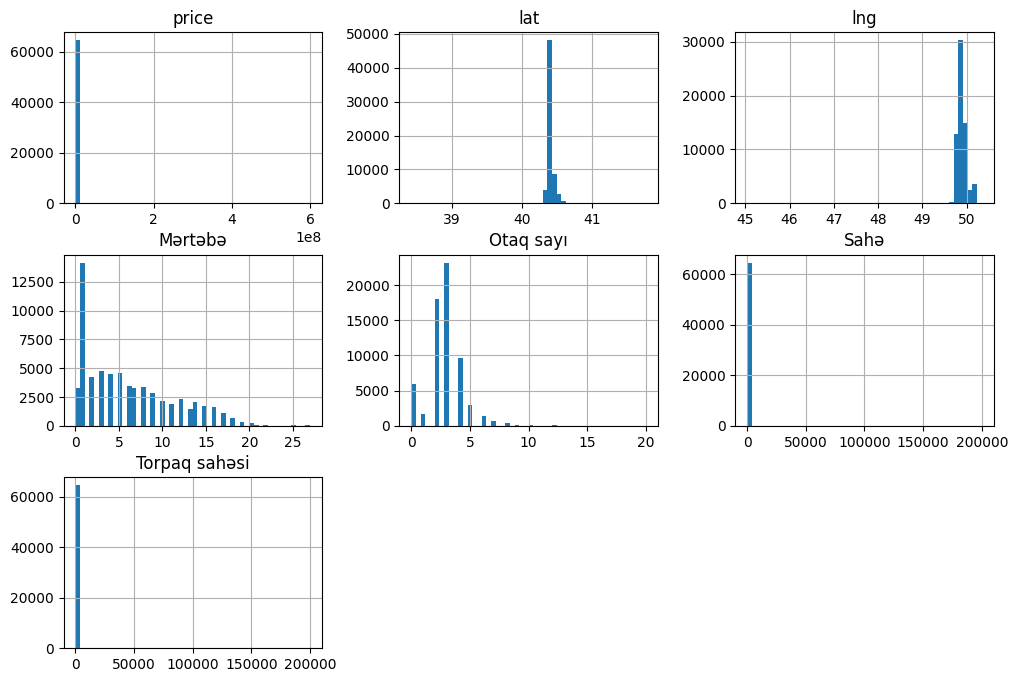

In [130]:
df.hist(bins=50, figsize=(12, 8))

array([[<Axes: title={'center': 'lng'}>, <Axes: title={'center': 'lat'}>]],
      dtype=object)

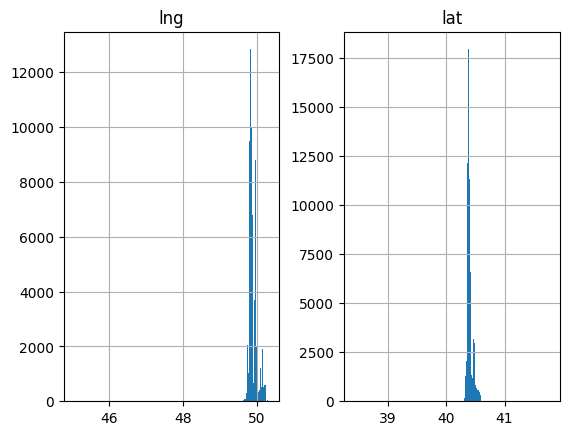

In [131]:
df[["lng", "lat"]].hist(bins=200)

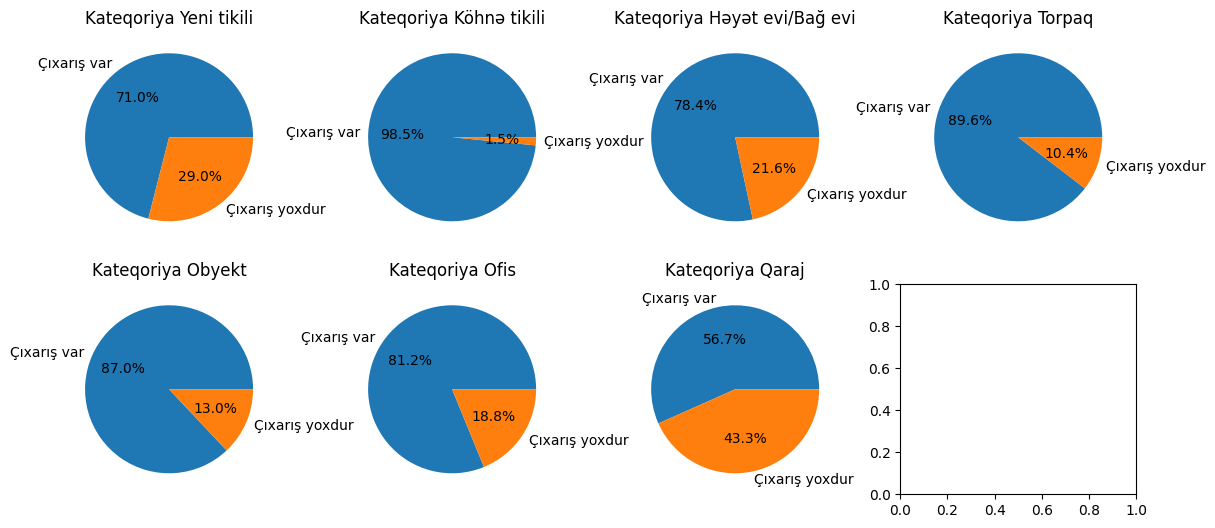

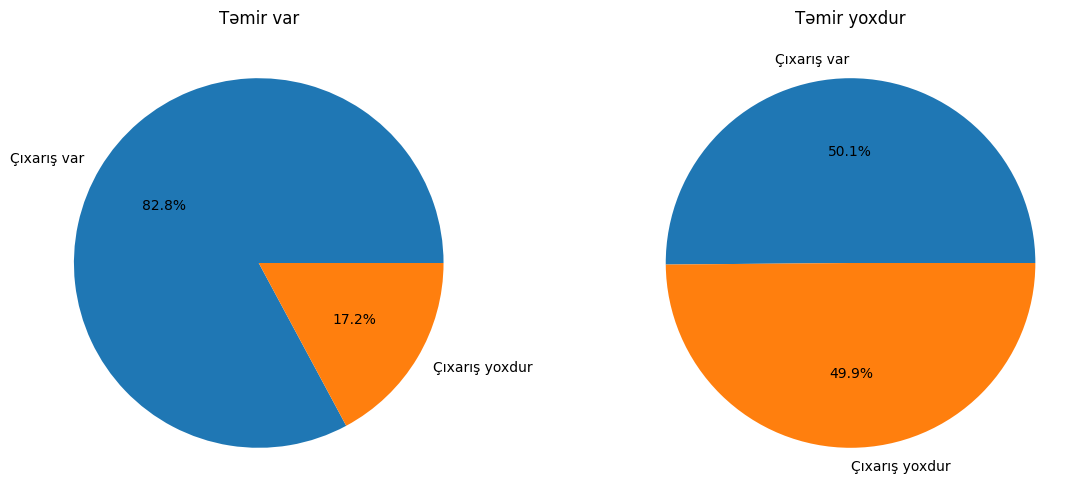

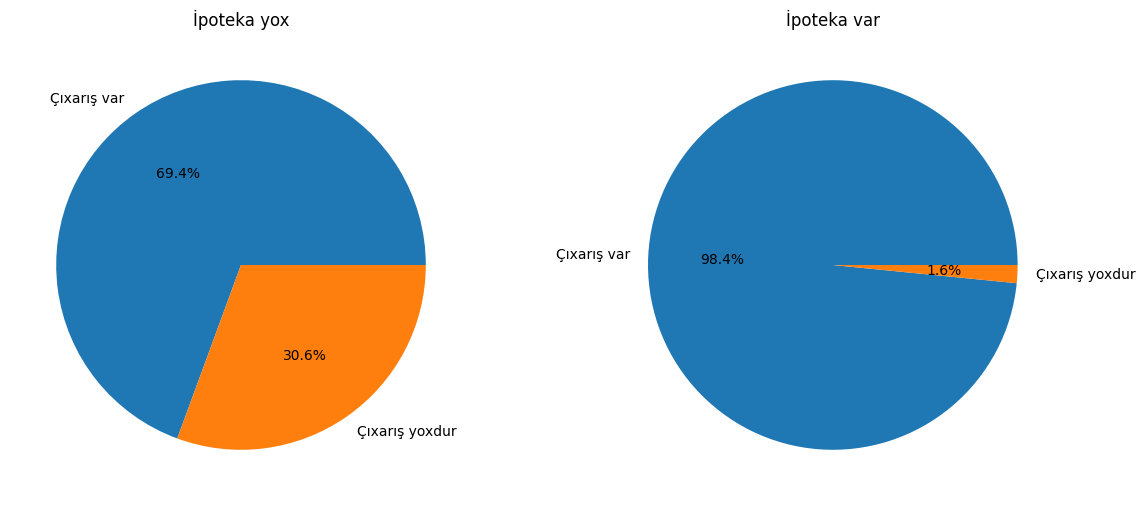

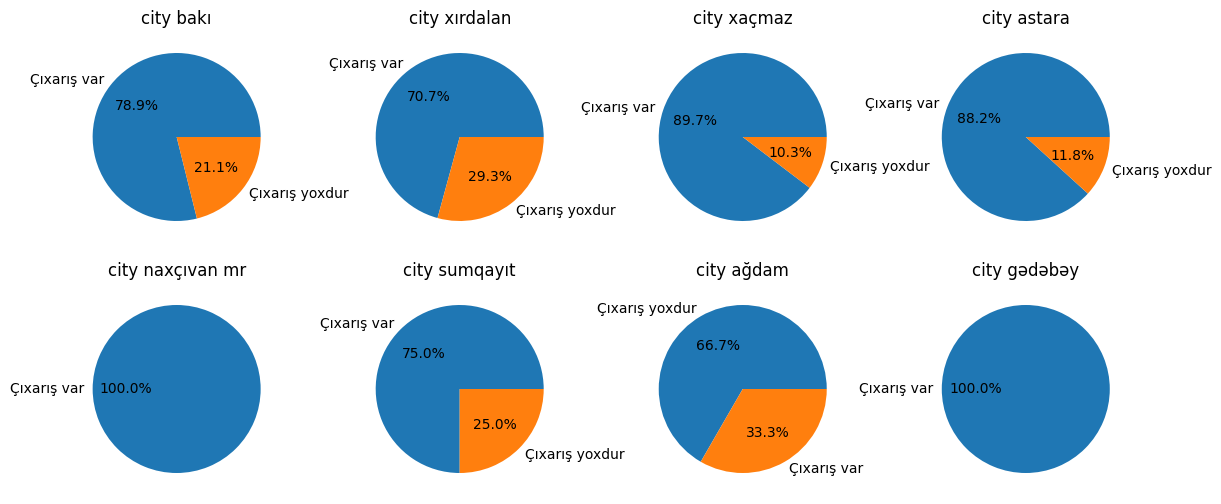

In [132]:
def creat_pie_plot(category=""):
    len_categoreis = len(df[category].value_counts().index)
    n_cols_categorie = round(len_categoreis / 2) if len_categoreis > 2 else 2
    n_rows_categorie = n_cols_categorie //2
    _, axes = plt.subplots(n_rows_categorie, n_cols_categorie, figsize=(14, 6))

    for axe, col in zip(axes.ravel(),df[category].value_counts().index):
        categorie_comb = df.loc[df[category] == col, [category, "Çıxarış"]]

        axe.pie(categorie_comb["Çıxarış"].value_counts().values, labels="Çıxarış " + categorie_comb["Çıxarış"].value_counts().index, autopct='%1.1f%%')
        
        axe.set_title(f"{category} {categorie_comb[category].values[0]}")
    

columns = ["Kateqoriya", "Təmir", "İpoteka", "city"]


for item in columns:
    creat_pie_plot(category=item)



## Future selection

In [133]:
label = LabelEncoder()
df_test = df.copy()
for item in df.select_dtypes(include='object'):
    df_test[item] = label.fit_transform(df[item])

df_test

,price,location,city,address,lat,lng,İpoteka,Təmir,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Çıxarış
1,77000.0,32,2,3087,40.420897,49.807035,1,1,0,1,4.0,90.0,1.3,1
2,92000.0,130,2,7834,40.390293,49.802656,1,1,0,1,3.0,60.0,0.1,0
4,220000.0,138,2,10328,40.390550,49.957675,1,1,6,15,3.0,100.0,0.0,0
5,650000.0,97,2,9393,40.372458,49.838651,1,1,1,3,4.0,130.0,0.0,0
8,3000000.0,77,2,8318,40.383231,49.826150,1,1,2,1,0.0,485.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100770,170000.0,34,2,3225,40.449401,49.774129,1,1,0,1,6.0,250.0,3.5,1
100771,520000.0,72,2,5090,40.491947,50.169690,0,1,0,1,4.0,220.0,11.0,0
100772,650000.0,72,2,15987,40.486308,50.167252,0,1,0,1,5.0,350.0,7.0,0
100773,310000.0,3,2,8031,40.412761,49.800789,0,1,6,4,3.0,130.0,0.0,0


In [134]:
X, y = df_test.drop(columns=["Çıxarış"]), df["Çıxarış"]

In [135]:
corr = df_test.corrwith(df_test["Çıxarış"]).sort_values(ascending=False)
corr

Çıxarış          1.000000
İpoteka          0.333612
Təmir            0.247646
Kateqoriya       0.189279
Mərtəbə          0.075205
city             0.002865
price           -0.003340
Torpaq sahəsi   -0.004261
Sahə            -0.013284
lat             -0.018413
address         -0.021556
lng             -0.030253
Otaq sayı       -0.037279
location        -0.061438
dtype: float64

<Axes: >

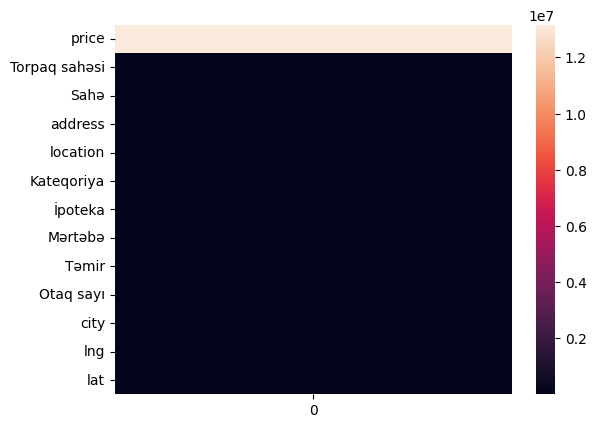

In [136]:

kbest = SelectKBest(score_func=chi2, k ="all")
fit = kbest.fit(X, y)

featureScores = pd.DataFrame(data=fit.scores_, index=list(X.columns))

sns.heatmap(featureScores.sort_values(ascending=False, by=0))

<Axes: >

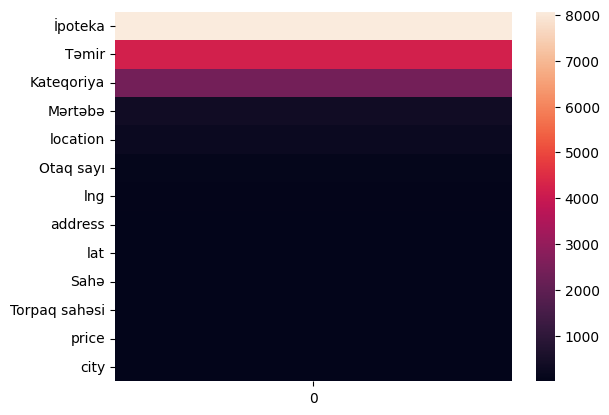

In [137]:
kbest = SelectKBest(score_func=f_classif, k ="all")
fit = kbest.fit(X, y)

featureScores = pd.DataFrame(data=fit.scores_, index=list(X.columns))

sns.heatmap(featureScores.sort_values(ascending=False, by=0))


In [138]:
df = df.drop(columns=["city", "lat", "lng", "Otaq sayı"])

## Encoding some columns

In [139]:
some_categories = ["İpoteka", "Təmir", "Çıxarış"]
lab_encode = LabelEncoder()
for item in some_categories:
    df[item] = lab_encode.fit_transform(df[item])

In [140]:
col_transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ["Kateqoriya"]),
    (StandardScaler(), ["Mərtəbə"]),
    (MinMaxScaler(), ["price", "Sahə", "Torpaq sahəsi"])
)
col_transformer.set_output(transform="pandas")

df_new = col_transformer.fit_transform(df)

df = pd.concat([df[some_categories], df_new], axis=1)

## Building Model

In [141]:
X, y = df.drop(columns=["Çıxarış"]), df["Çıxarış"]

In [142]:
def stratified_prediciton(model):
    skf = StratifiedKFold(n_splits=2, random_state=42, shuffle=True)

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print(f"Kfold: {fold}\n{classification_report(y_test, pred)}")
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### Baseline Model

Kfold: 0
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     25420
           1       0.65      0.29      0.41      6807

    accuracy                           0.82     32227
   macro avg       0.74      0.63      0.65     32227
weighted avg       0.80      0.82      0.79     32227

Kfold: 1
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     25420
           1       0.64      0.28      0.39      6806

    accuracy                           0.82     32226
   macro avg       0.74      0.62      0.64     32226
weighted avg       0.79      0.82      0.79     32226



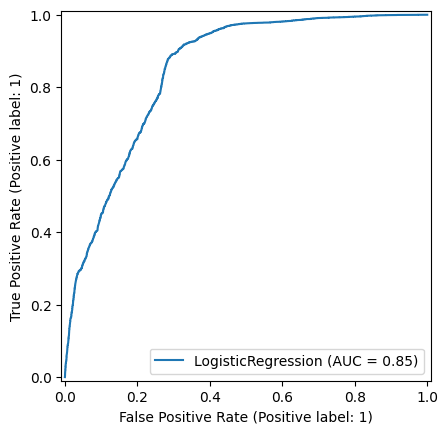

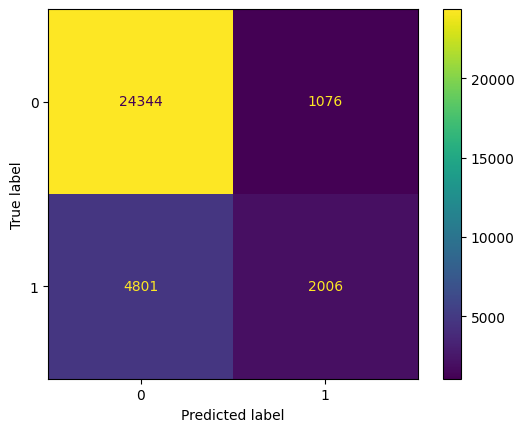

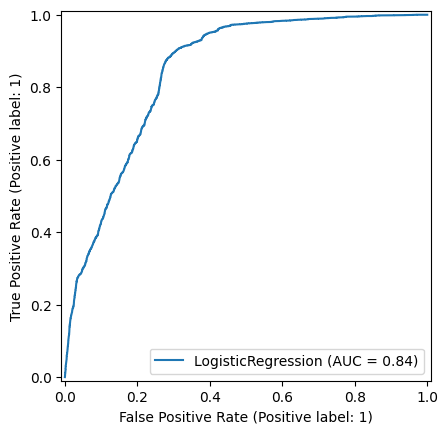

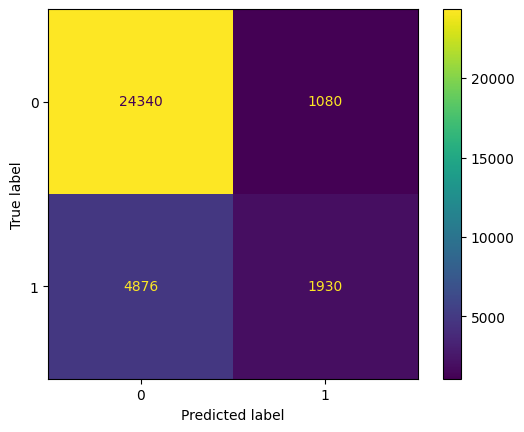

In [143]:
logit_reg = LogisticRegression(random_state=42, n_jobs=-1, max_iter=10_000)
stratified_prediciton(logit_reg);

### Best performed model

Kfold: 0
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     25420
           1       0.70      0.65      0.67      6807

    accuracy                           0.87     32227
   macro avg       0.80      0.79      0.79     32227
weighted avg       0.86      0.87      0.86     32227

Kfold: 1
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     25420
           1       0.70      0.63      0.66      6806

    accuracy                           0.86     32226
   macro avg       0.80      0.78      0.79     32226
weighted avg       0.86      0.86      0.86     32226



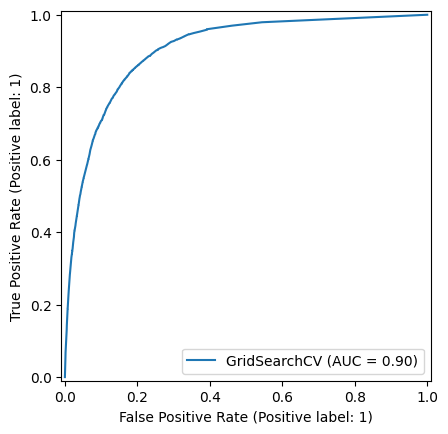

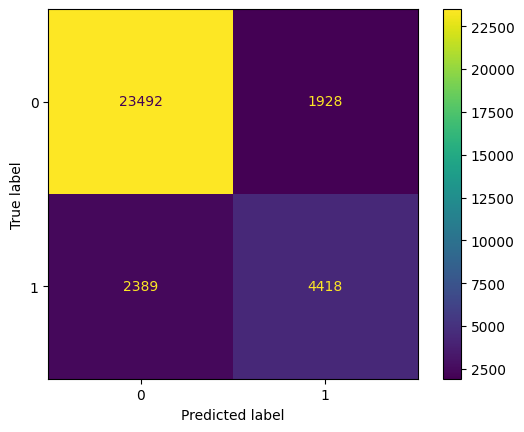

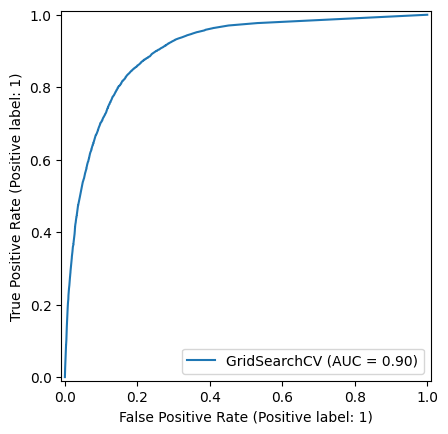

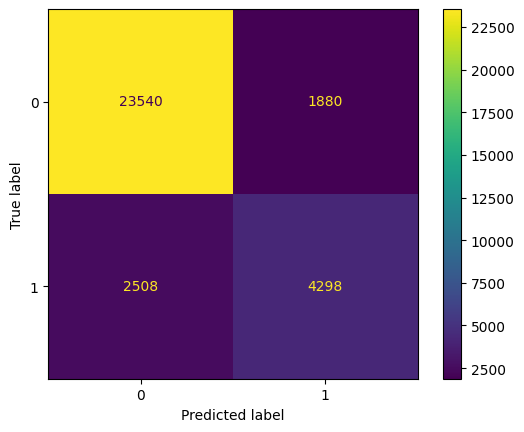

In [144]:
grid = {"n_estimators": np.arange(0, 200, 50)}

ran_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=grid, cv=3, n_jobs=-1)

stratified_prediciton(ran_clf);

Kfold: 0
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     25420
           1       0.69      0.59      0.64      6807

    accuracy                           0.86     32227
   macro avg       0.79      0.76      0.77     32227
weighted avg       0.85      0.86      0.85     32227

Kfold: 1
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     25420
           1       0.69      0.56      0.62      6806

    accuracy                           0.85     32226
   macro avg       0.79      0.75      0.76     32226
weighted avg       0.85      0.85      0.85     32226



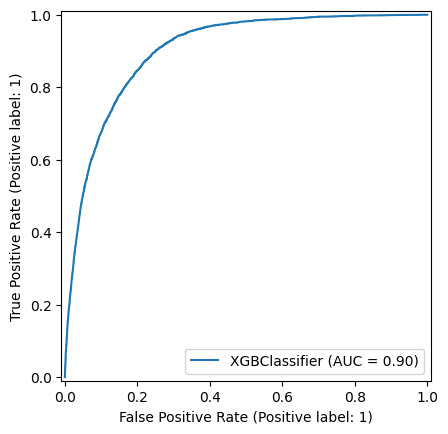

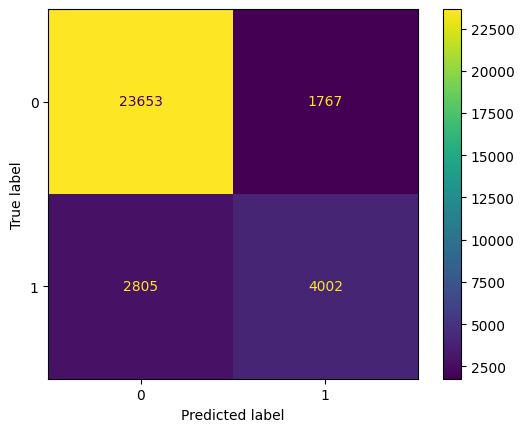

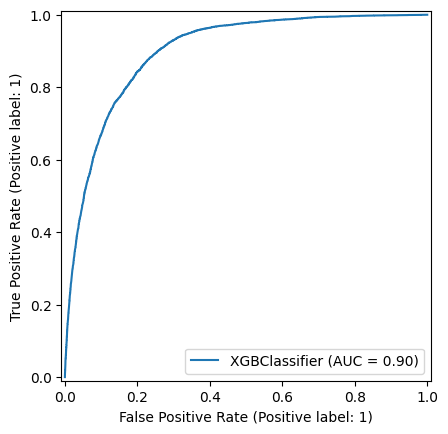

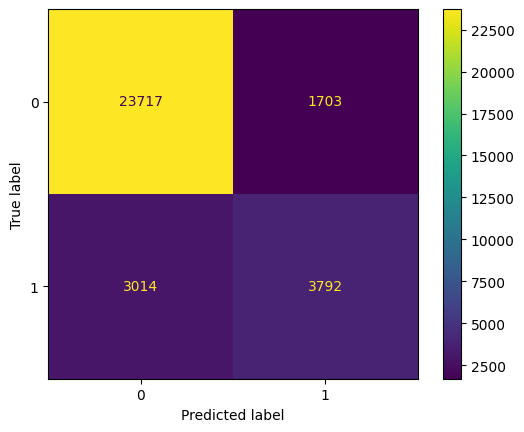

In [146]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=ran_clf.best_estimator_.n_estimators, n_jobs=-1, random_state=42)
stratified_prediciton(xgb)